<h1>DSS 740 - Final</h1>
<h2>Jessica Gobeil,Adam King, and David Kratz</h2>


<h2>Preprocessing The Data</h2>

<h3>To start preprocessing we first need to import the libraries we will need throught out the project.</h3>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import wandb
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

<h3> Next we will load the Mental Health in Tech data set from Kaggle. We will also explore the dataset before preprocessing. </h3>

In [62]:
df = pd.read_csv(r"C:\Users\adamr\Documents\DSS740_ML\DSS740_Final\survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [64]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Gender                         0  0.000000
Timestamp                      0  0.000000
Age                            0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
Country                        0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
wellness_program               0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
supervisor                     0  0.000000
coworkers  

<h3> We can see that comments, state, work_interfere, and self_employed have missing values. Columns that we can drop that aren't necessary are timestamp, comments, and state.</h3>

In [65]:
import sys
sys.path.append(r"C:\Users\adamr\Documents\DSS740_ML\sju_spring2025_ml\Src\data_preprocessing")
from data_preprocessing import PreProcessData
preprocess = PreProcessData(scaleType='normalize')

In [66]:
preprocess.data = df.copy()

In [67]:
columns_to_drop = ['Timestamp','comments','state']
df = preprocess.data.drop(columns=columns_to_drop)
print(df.head())

   Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States           NaN             No       Yes   
1   44       M   United States           NaN             No        No   
2   32    Male          Canada           NaN             No        No   
3   31    Male  United Kingdom           NaN            Yes       Yes   
4   31    Male   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often            6-25          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely            6-25          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat 

In [68]:
print(df['Gender'].unique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


<h3>The gender column is a mess. Way too many errors or answers that can fall into a few categories. Let's go with male, female, trans</h3>

In [69]:
gender = df['Gender'].str.lower()
gender = df['Gender'].unique()

In [70]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [71]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


<h3>Let's take a better look at the remaining categorical variables</h3>

In [72]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


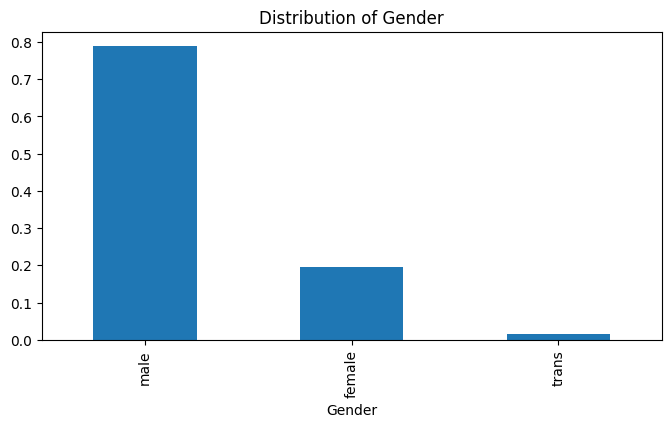

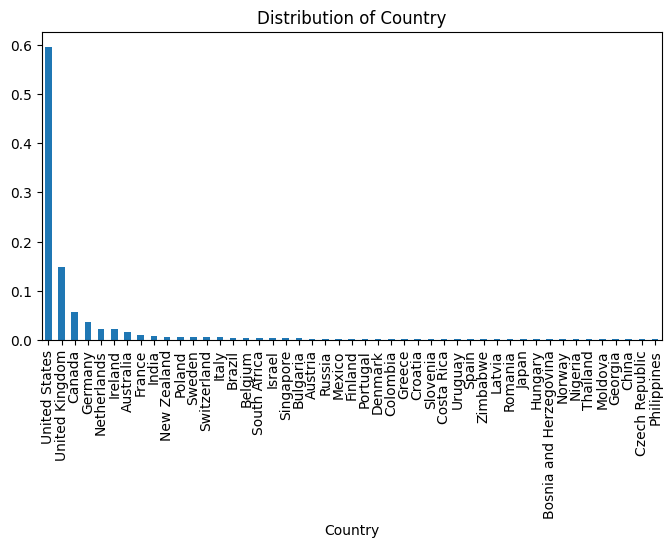

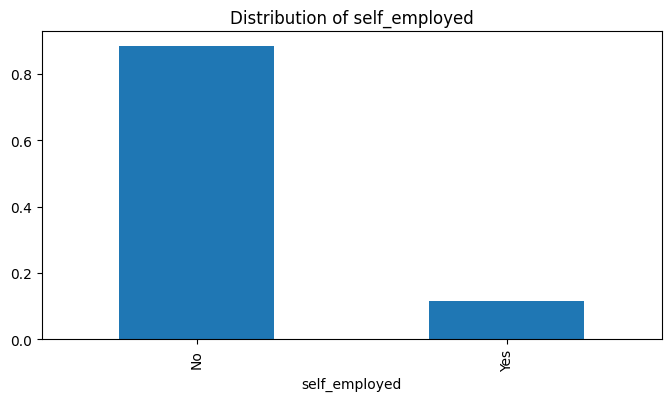

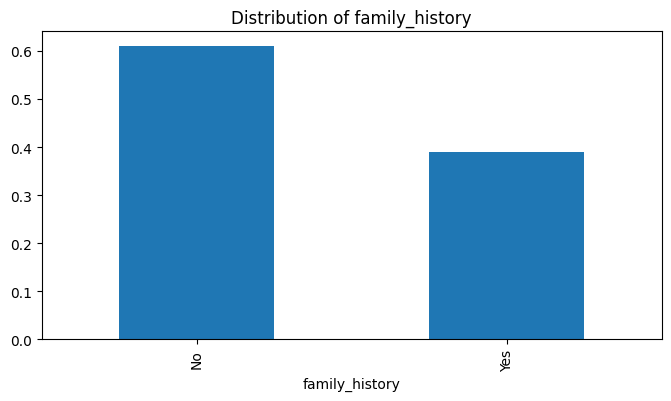

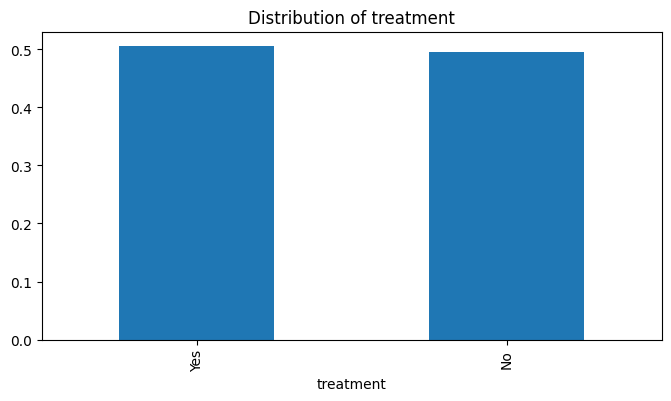

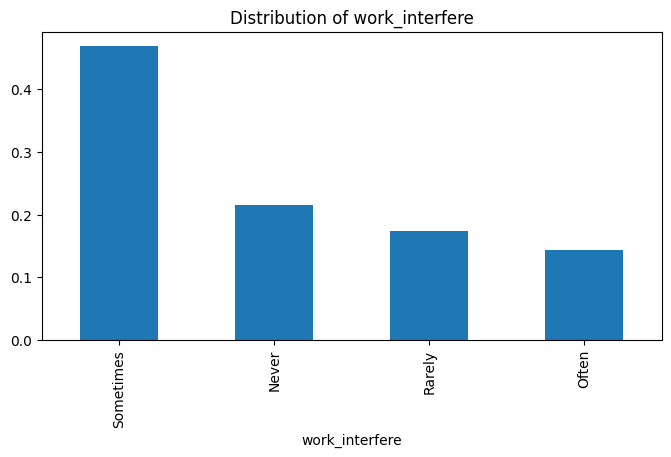

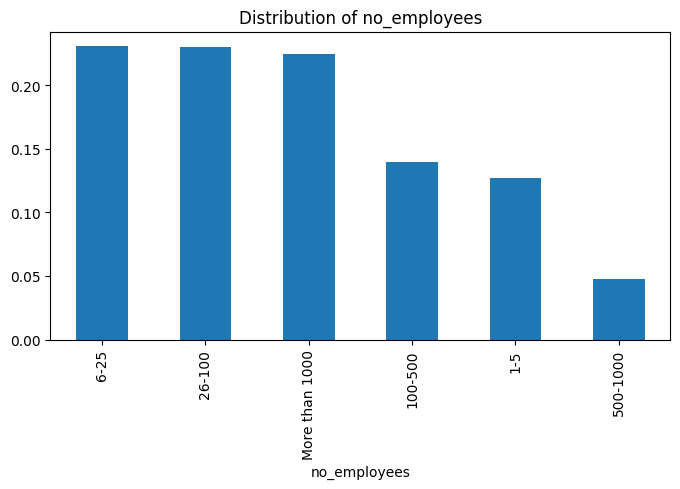

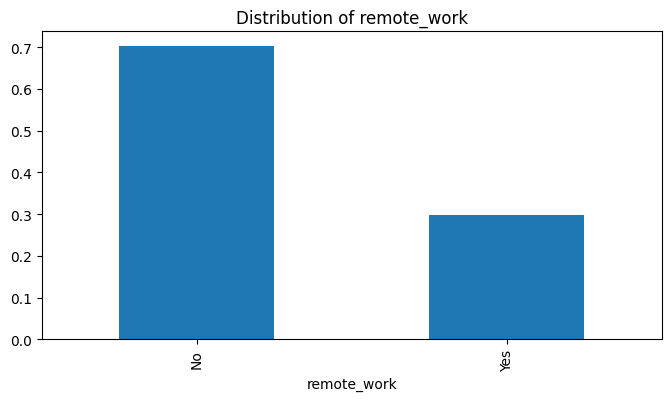

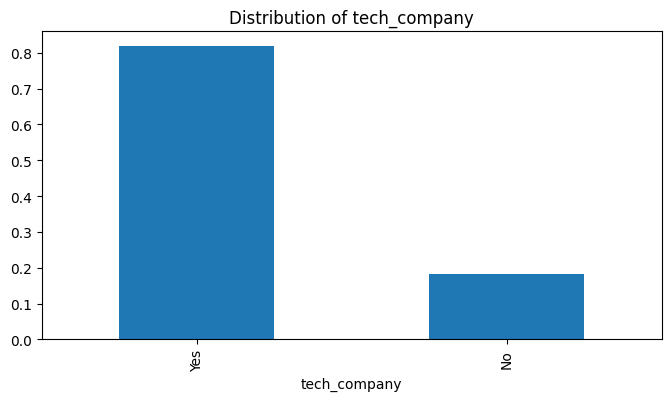

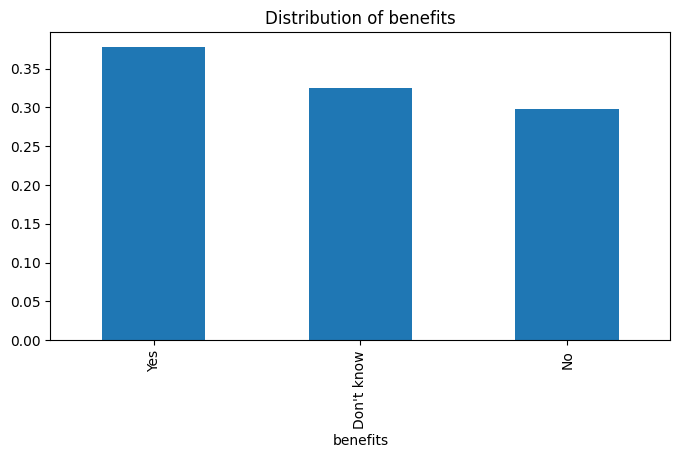

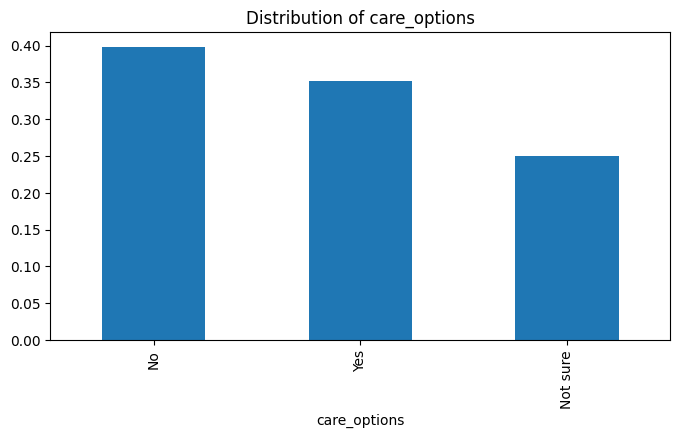

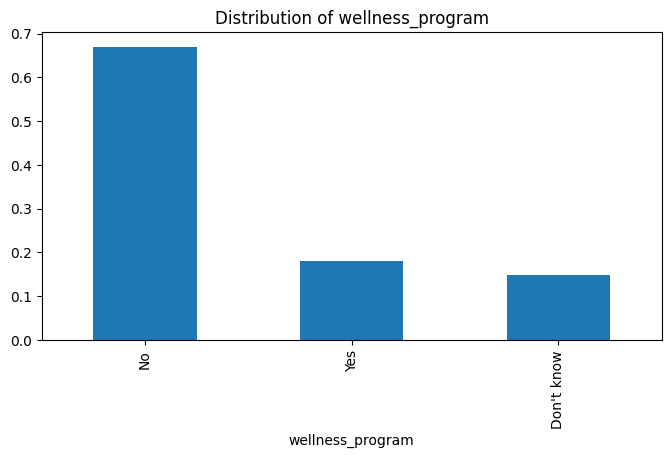

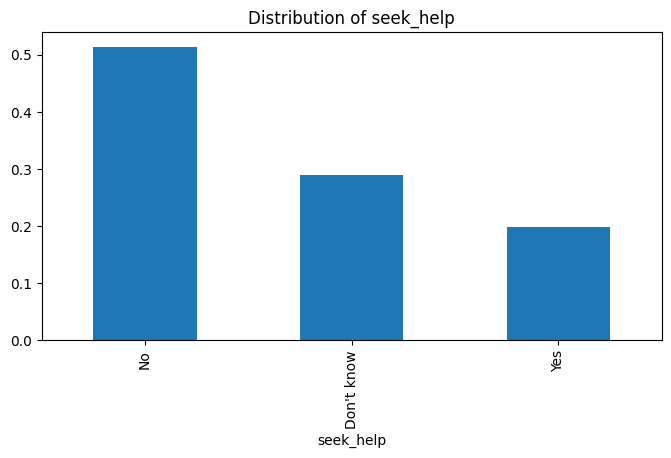

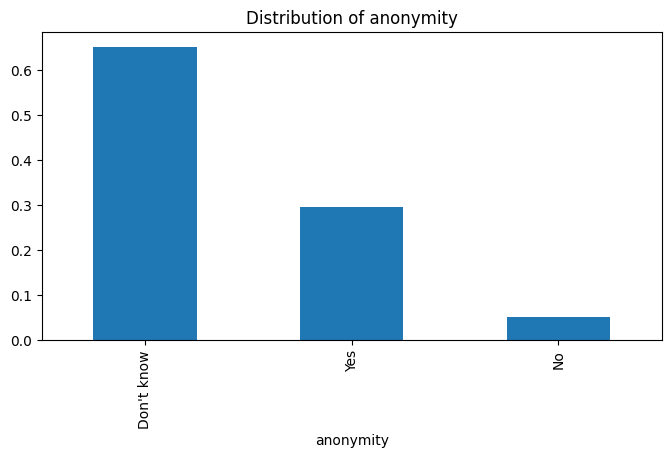

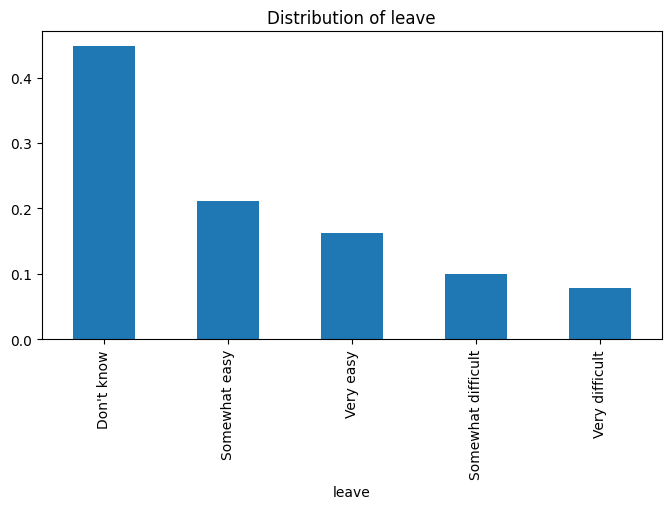

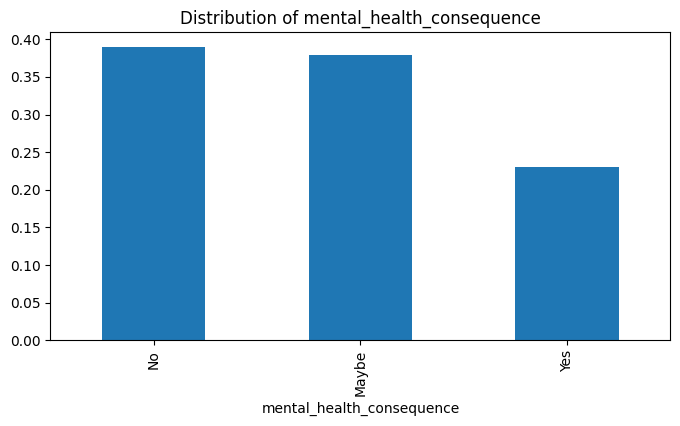

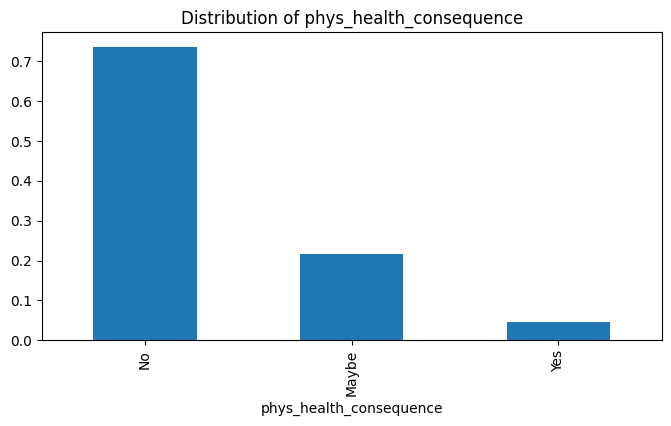

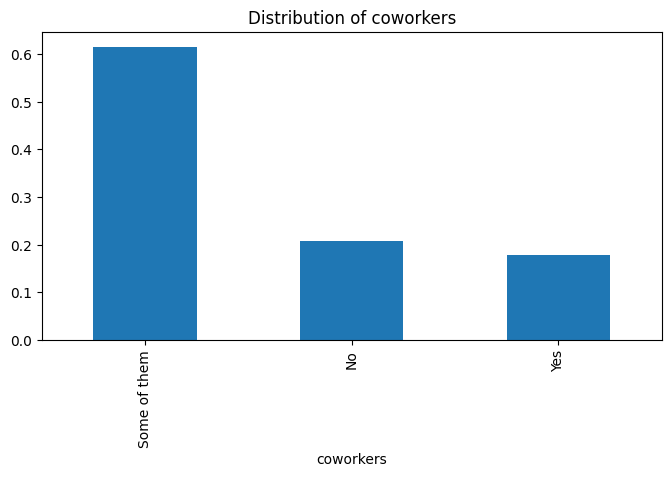

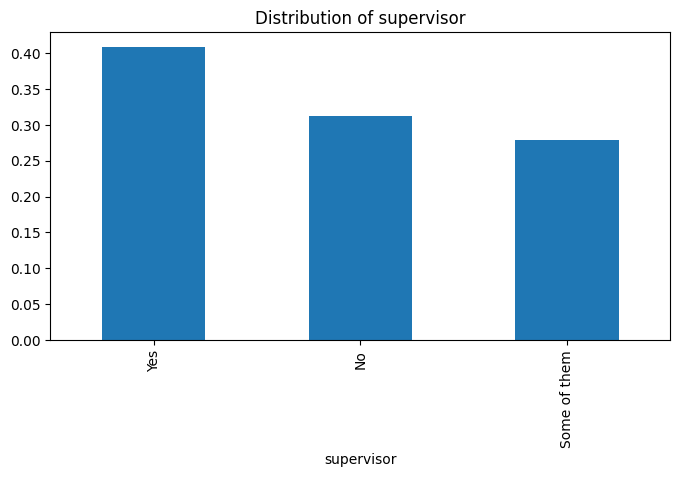

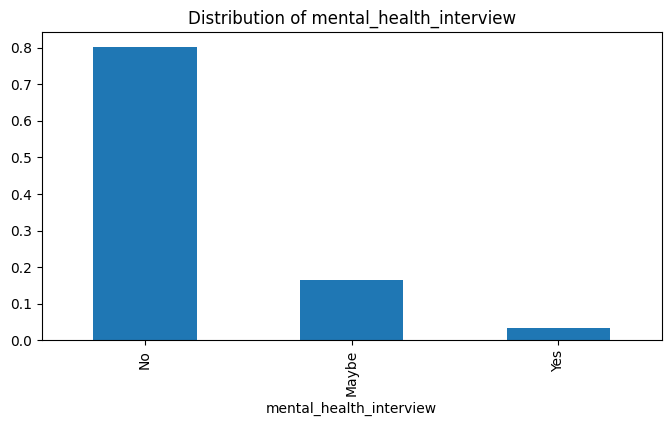

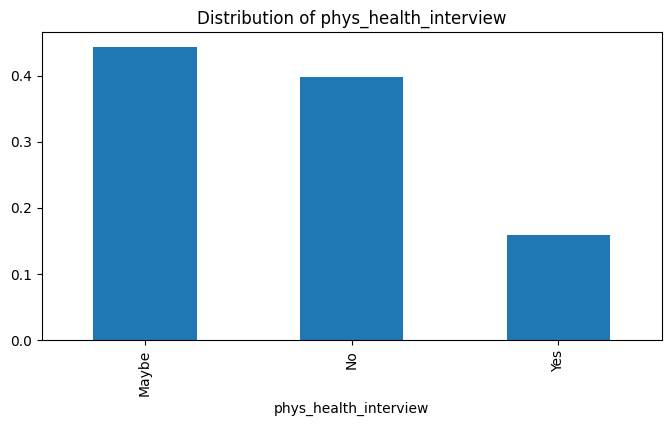

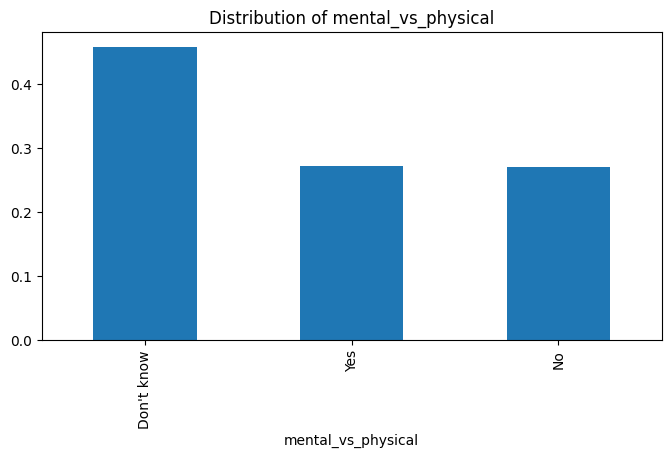

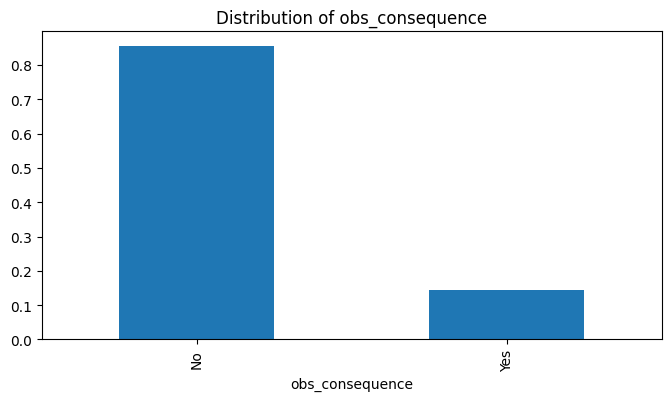

In [73]:
for col in categorical_columns:
    fig = plt.figure(figsize=(8, 4))
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

<h3>Impute any missing variables with 0s or NaN</h3>

In [74]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0


intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head(5)   

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [75]:
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [76]:
df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


<h3> Change any yes/no varibales to binary</h3>

In [77]:
binary_columns = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']

df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


In [78]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,0,0,1,Often,6-25,0,1,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0
1,44,male,United States,0,0,0,Rarely,More than 1000,0,0,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,0
2,32,male,Canada,0,0,0,Rarely,6-25,0,1,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0
3,31,male,United Kingdom,0,1,1,Often,26-100,0,1,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1
4,31,male,United States,0,0,0,Never,100-500,1,1,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0


<h3>Based on the visuals, country and number of employees won't have much of an affect, so we'll drop them. </h3>

In [79]:
df = df.drop(['Country','no_employees'], axis=1)
print(df.head())

   Age  Gender  self_employed  family_history  treatment work_interfere  \
0   37  female              0               0          1          Often   
1   44    male              0               0          0         Rarely   
2   32    male              0               0          0         Rarely   
3   31    male              0               1          1          Often   
4   31    male              0               0          0          Never   

   remote_work  tech_company    benefits care_options  ...   anonymity  \
0            0             1         Yes     Not sure  ...         Yes   
1            0             0  Don't know           No  ...  Don't know   
2            0             1          No           No  ...  Don't know   
3            0             1          No          Yes  ...          No   
4            1             1         Yes           No  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy        

<h3>Encode dummy variables for the rest</h3>

In [80]:
df = pd.get_dummies(
    df,
    columns=[
        'Gender', 'work_interfere', 'benefits', 'care_options',
        'wellness_program', 'seek_help', 'anonymity', 'leave',
        'mental_health_consequence', 'phys_health_consequence', 'coworkers',
        'supervisor', 'mental_health_interview', 'phys_health_interview',
        'mental_vs_physical'
    ],
    drop_first=True,
    dtype=int
)
print(df.head())

   Age  self_employed  family_history  treatment  remote_work  tech_company  \
0   37              0               0          1            0             1   
1   44              0               0          0            0             0   
2   32              0               0          0            0             1   
3   31              0               1          1            0             1   
4   31              0               0          0            1             1   

   obs_consequence  Gender_male  Gender_trans  work_interfere_Never  ...  \
0                0            0             0                     0  ...   
1                0            1             0                     0  ...   
2                0            1             0                     0  ...   
3                1            1             0                     0  ...   
4                0            1             0                     1  ...   

   coworkers_Some of them  coworkers_Yes  supervisor_Some of them  \

<h3>Some visuals to get an idea of relationships in the data </h3>

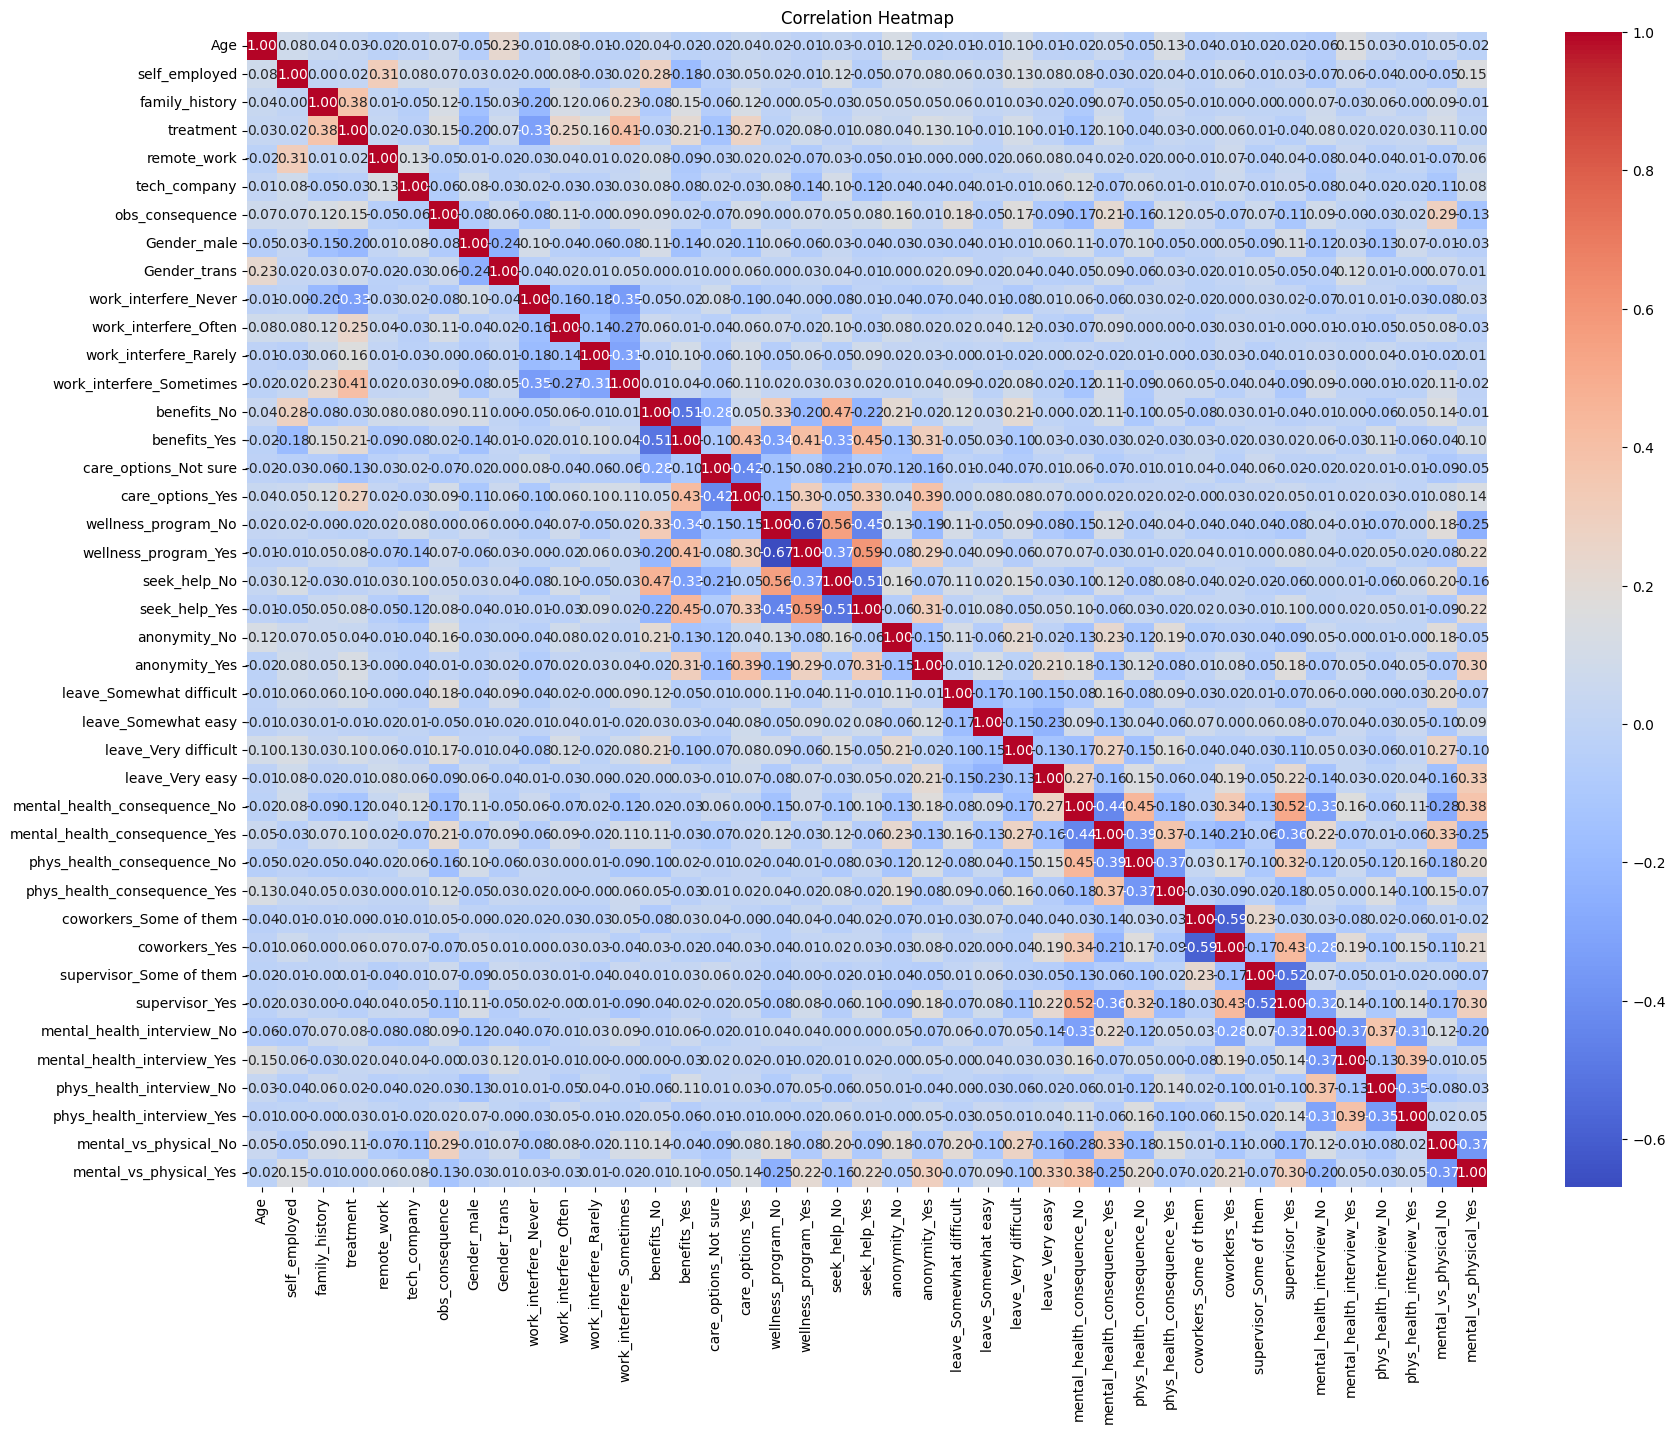

In [81]:
plt.figure(figsize=(20, 15)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

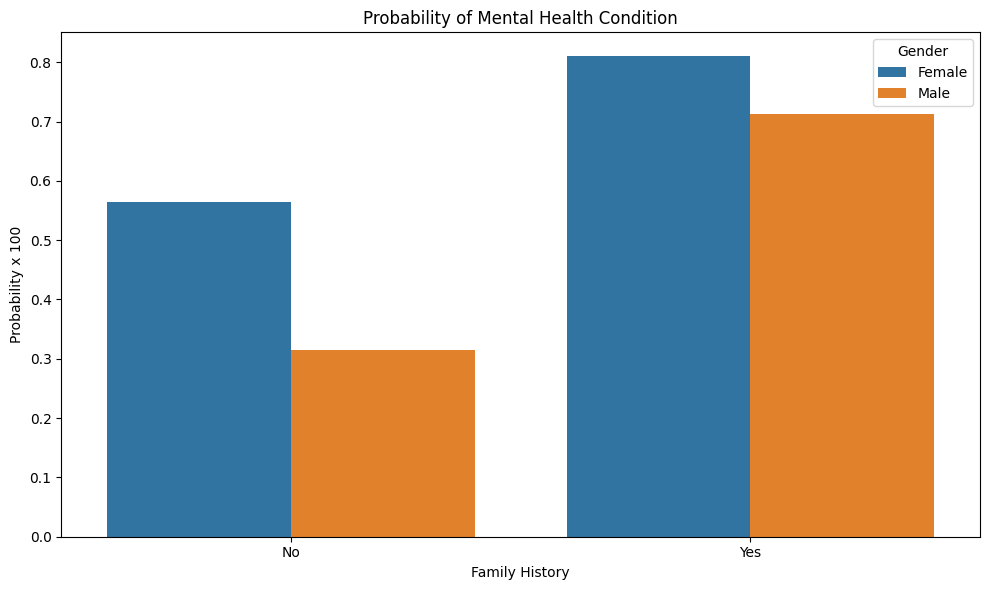

In [82]:
df_plot = df.copy()
df_plot['family_history'] = df['family_history'].map({1: 'Yes', 0: 'No'})
df_plot['Gender'] = df['Gender_male'].map({1: 'Male', 0: 'Female'})  


plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='family_history', y='treatment', hue='Gender', ci=None)

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

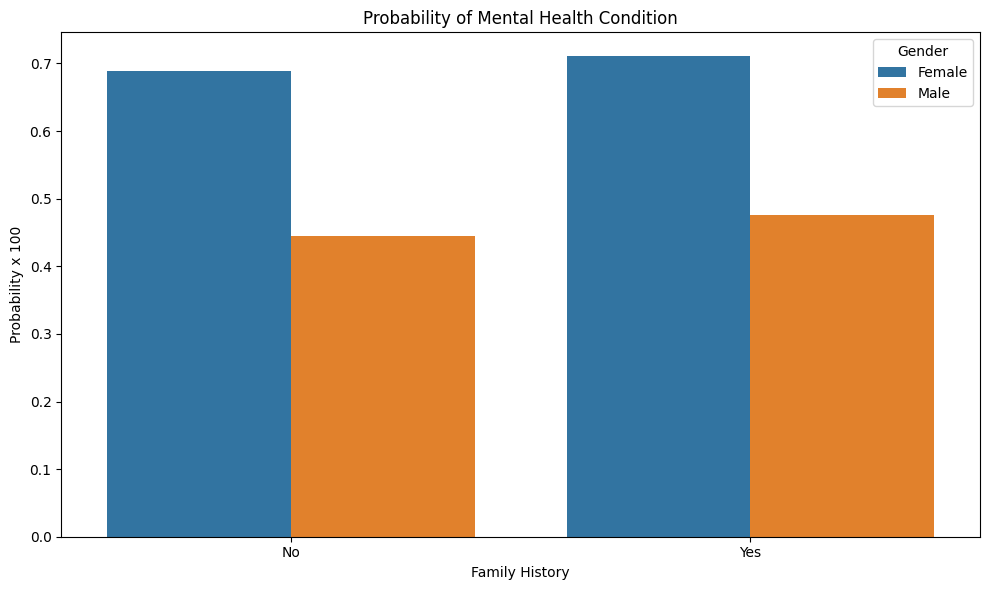

In [83]:
df_plot = df.copy()
df_plot['remote_work'] = df['remote_work'].map({1: 'Yes', 0: 'No'})
df_plot['Gender'] = df['Gender_male'].map({1: 'Male', 0: 'Female'})  


plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='remote_work', y='treatment', hue='Gender', ci=None)

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<h3>We have realized that the age variable is a mess, so we need to clean that up</h3>

In [84]:
print(df['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61          11          72]


In [85]:
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

In [86]:
df['Age'].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

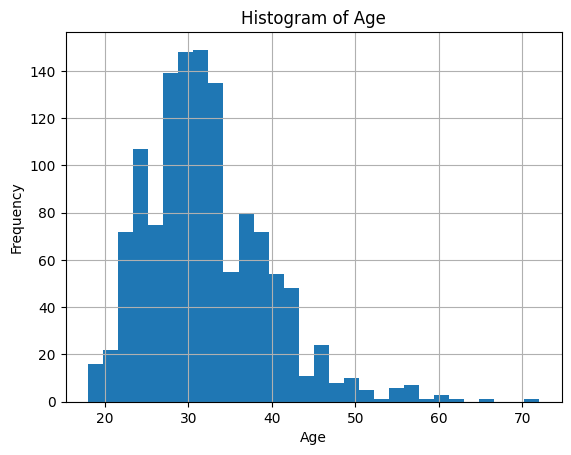

In [87]:
df['Age'].hist(bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h3> Scale the data before we start making our models </h3>

In [88]:
minmax_scaler = MinMaxScaler()
df[['Age']] = minmax_scaler.fit_transform(df[['Age']])
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,Gender_male,Gender_trans,work_interfere_Never,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,0.351852,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0.481481,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.259259,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
3,0.240741,0,1,1,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.240741,0,0,0,1,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


<h3>Save preprocessed data as a new csv</h3>

In [89]:
df.to_csv('cleaned_survey_data.csv', index=False)

In [90]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv(r"C:\Users\adamr\Documents\DSS740_ML\DSS740_Final\cleaned_survey_data.csv")
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,Gender_male,Gender_trans,work_interfere_Never,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,0.351852,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0.481481,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.259259,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
3,0.240741,0,1,1,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.240741,0,0,0,1,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


In [93]:
X = df.drop('treatment', axis=1)
y = df['treatment']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [95]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

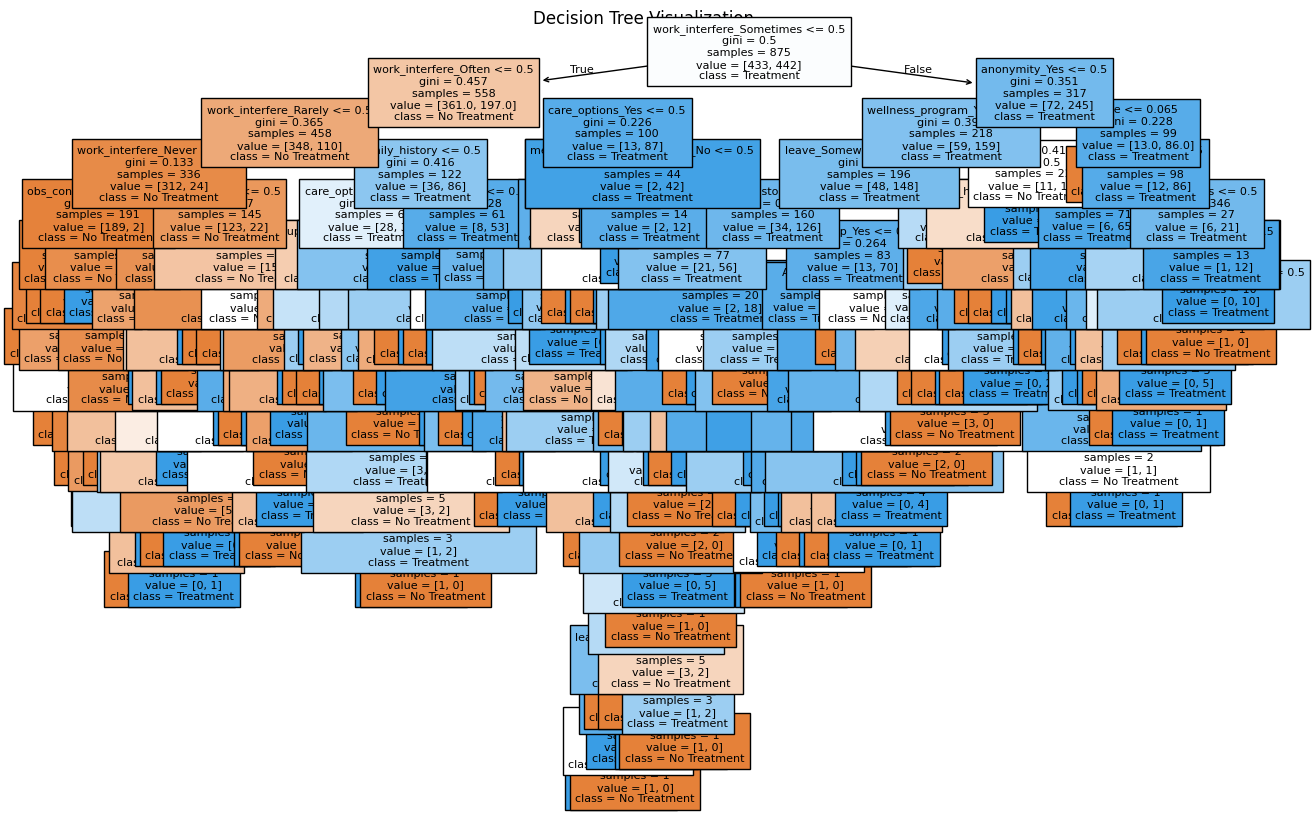

In [96]:
target_names = ['No Treatment', 'Treatment']
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=target_names, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()


--- Base Model Evaluation ---

Decision Tree:
              precision    recall  f1-score   support

No Treatment       0.73      0.74      0.74       186
   Treatment       0.74      0.73      0.74       190

    accuracy                           0.74       376
   macro avg       0.74      0.74      0.74       376
weighted avg       0.74      0.74      0.74       376



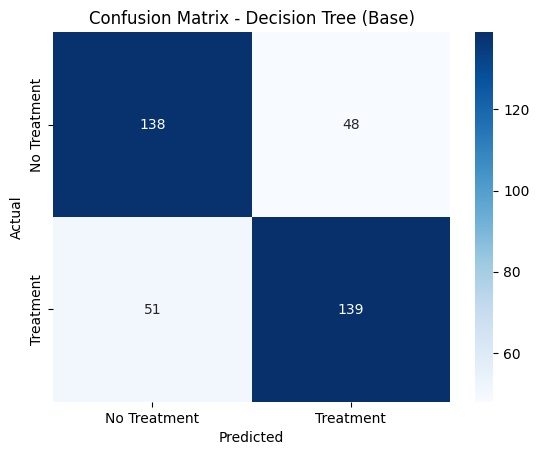

In [97]:
# --- Model Validation ---

# Evaluate base models on the test set
print("\n--- Base Model Evaluation ---")

# Decision Tree
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree:")
print(classification_report(y_test, dt_predictions, target_names=target_names))
cm_dt = confusion_matrix(y_test, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (Base)')
plt.show()

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
dictionary = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [100]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dict_search = GridSearchCV(dt, dictionary, cv=5, scoring='accuracy')

In [101]:
dict_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [105]:
print("Best Decision Tree Parameters:", dict_search.best_params_)

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [106]:
optimal_tree = dict_search.best_estimator_

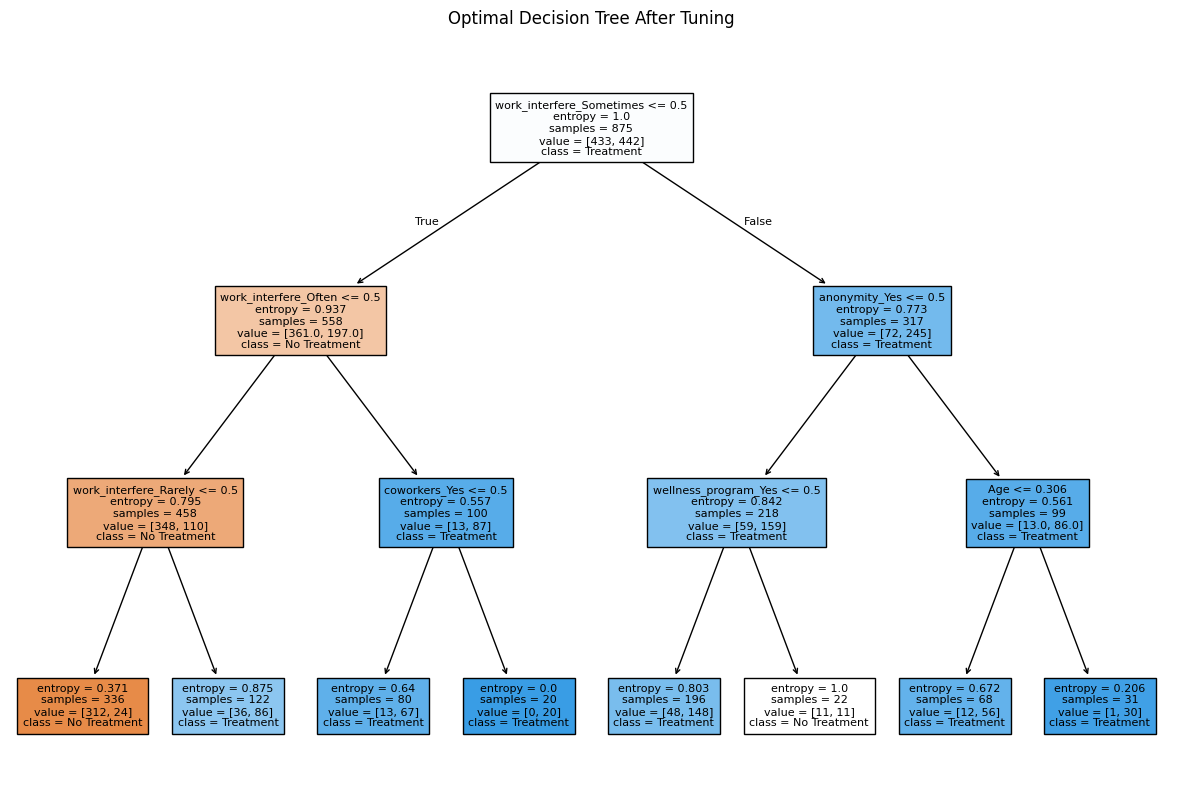

In [108]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(optimal_tree, feature_names=X_train.columns, class_names=['No Treatment', 'Treatment'], filled=True, fontsize=8)
plt.title("Optimal Decision Tree After Tuning")
plt.show()


--- Hypertuned Model Evaluation ---

Hypertuned Decision Tree:
              precision    recall  f1-score   support

No Treatment       0.85      0.69      0.77       186
   Treatment       0.75      0.88      0.81       190

    accuracy                           0.79       376
   macro avg       0.80      0.79      0.79       376
weighted avg       0.80      0.79      0.79       376



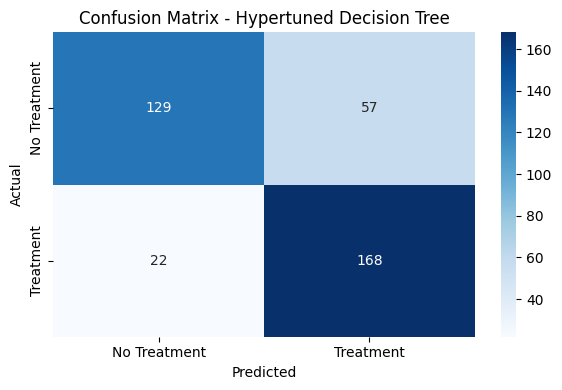

In [110]:
print("\n--- Hypertuned Model Evaluation ---")


hypertuned_predictions = optimal_tree.predict(X_test)


print("\nHypertuned Decision Tree:")
print(classification_report(y_test, hypertuned_predictions, target_names=target_names))


cm_hypertuned = confusion_matrix(y_test, hypertuned_predictions)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_hypertuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Hypertuned Decision Tree')
plt.tight_layout()
plt.show()



--- Learning Curve ---


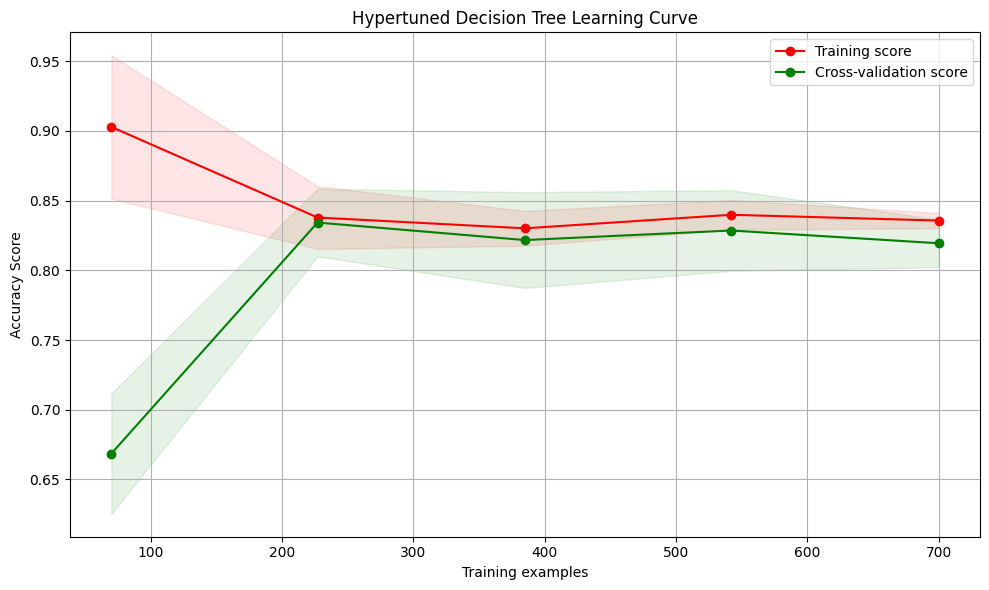

In [114]:
# --- Learning Curve ---

print("\n--- Learning Curve ---")

def plot_learning_curve(estimator, title, X, y, axes=None, train_sizes=np.linspace(0.1, 1.0, 5), cv=None, scoring='accuracy'):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Accuracy Score")
    axes.grid()
    axes.legend(loc="best")
    return plt

# Create and plot the learning curve for the hypertuned Decision Tree
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_learning_curve(optimal_tree, "Hypertuned Decision Tree Learning Curve",
                    X_train, y_train, axes=ax, cv=5, scoring='accuracy')
plt.tight_layout()
plt.show()


<h1>Logistic Regression</h1>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import wandb
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

In [117]:
df = pd.read_csv(r"C:\Users\adamr\Documents\DSS740_ML\DSS740_Final\cleaned_survey_data.csv")
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,Gender_male,Gender_trans,work_interfere_Never,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,0.351852,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0.481481,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.259259,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
3,0.240741,0,1,1,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.240741,0,0,0,1,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


<h3>Now that the data set is cleaned up, we can split into testing and training data</h3>

In [118]:
X = df.drop('treatment', axis=1)
y = df['treatment']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [120]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (875, 40)
X_test shape: (376, 40)
y_train shape: (875,)
y_test shape: (376,)


In [121]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')


Logistic Regression:
              precision    recall  f1-score   support

No Treatment       0.87      0.75      0.81       186
   Treatment       0.78      0.89      0.84       190

    accuracy                           0.82       376
   macro avg       0.83      0.82      0.82       376
weighted avg       0.83      0.82      0.82       376



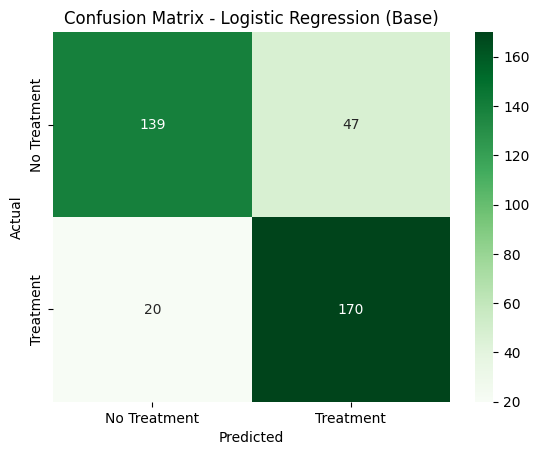

In [122]:
lr_predictions = lr_model.predict(X_test)
target_names = ['No Treatment', 'Treatment']

print("\nLogistic Regression:")
print(classification_report(y_test, lr_predictions, target_names=target_names))

cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Base)')
plt.show()

<h3>The precision, recall, and accuracy can be improved upon from this first attempt. We will need to work to improve this model.</h3>

In [124]:
print("\n--- Cross-Validation ---")

lr_cv_scores = cross_val_score(LogisticRegression(random_state=42, solver='liblinear'),
                                X_train, y_train, cv=5, scoring='accuracy')
print(f"\nLogistic Regression Cross-Validation Accuracy Scores: {lr_cv_scores}")
print(f"Logistic Regression Mean Cross-Validation Accuracy: {lr_cv_scores.mean():.4f}")


--- Cross-Validation ---

Logistic Regression Cross-Validation Accuracy Scores: [0.85142857 0.8        0.85714286 0.80571429 0.82285714]
Logistic Regression Mean Cross-Validation Accuracy: 0.8274


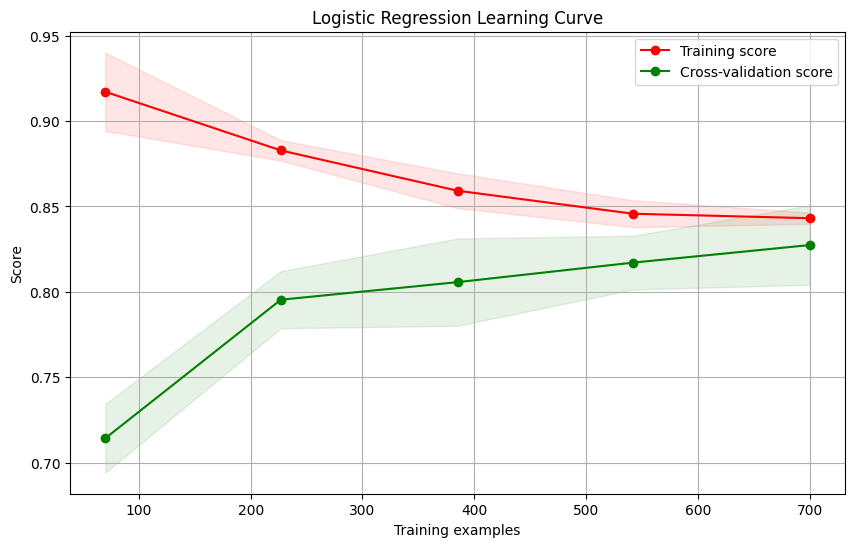

In [125]:
def plot_learning_curve(estimator, title, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=None, scoring='accuracy'):
    plt.figure(figsize=(10, 6))

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

# Call for Logistic Regression only
plot_learning_curve(LogisticRegression(random_state=42, solver='liblinear'),
                    "Logistic Regression Learning Curve",
                    X_train, y_train, cv=5, scoring='accuracy')

<h3>The model is currently overfitting</h3>


--- Validation Curves ---


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


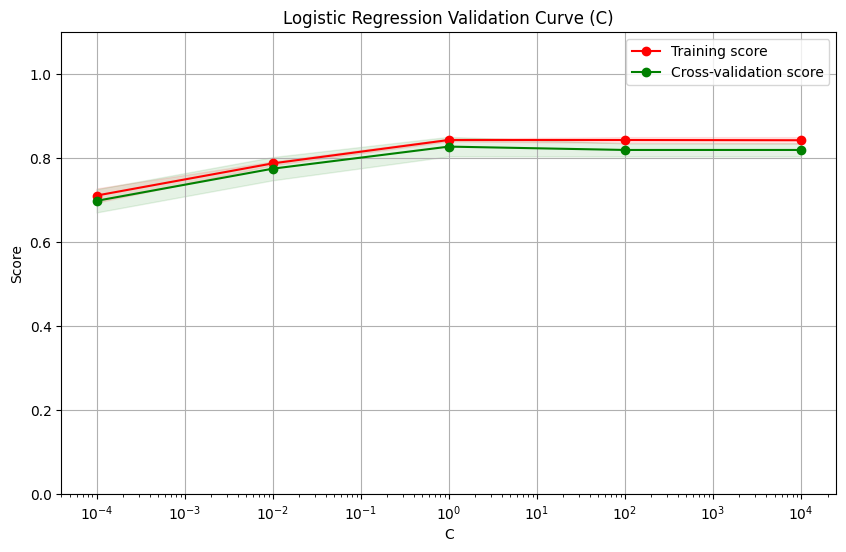

In [126]:
print("\n--- Validation Curves ---")

def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None, scoring='accuracy'):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.semilogx(param_range, train_scores_mean, 'o-', label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.semilogx(param_range, test_scores_mean, 'o-', label="Cross-validation score", color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

param_range_lr = np.logspace(-4, 4, 5)
plot_validation_curve(LogisticRegression(random_state=42, solver='liblinear'),
                        "Logistic Regression Validation Curve (C)",
                        X_train, y_train,
                        param_name="C", param_range=param_range_lr, cv=5, scoring='accuracy')

In [127]:
print("\n--- Hyperparameter Tuning using Grid Search CV ---")
lr_param_grid = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42),
                               param_grid=lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

print("\nLogistic Regression Best Parameters:", lr_grid_search.best_params_)
lr_best_model = lr_grid_search.best_estimator_


--- Hyperparameter Tuning using Grid Search CV ---

Logistic Regression Best Parameters: {'C': np.float64(0.3593813663804626), 'penalty': 'l1', 'solver': 'liblinear'}



Logistic Regression (Tuned):
              precision    recall  f1-score   support

No Treatment       0.92      0.74      0.82       186
   Treatment       0.79      0.94      0.86       190

    accuracy                           0.84       376
   macro avg       0.85      0.84      0.84       376
weighted avg       0.85      0.84      0.84       376



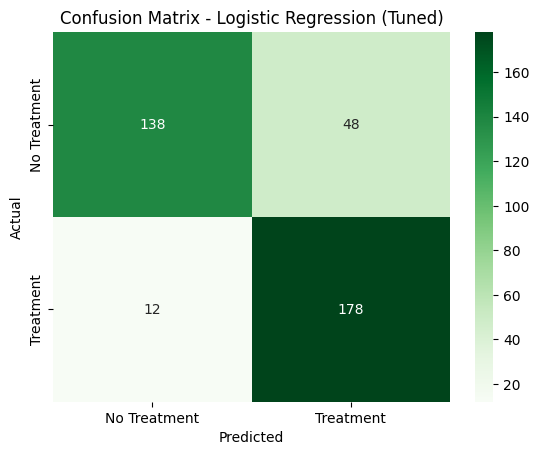

In [128]:
# Tuned Logistic Regression Model
lr_tuned_predictions = lr_best_model.predict(X_test)
print("\nLogistic Regression (Tuned):")
print(classification_report(y_test, lr_tuned_predictions, target_names=target_names))
cm_lr_tuned = confusion_matrix(y_test, lr_tuned_predictions)
sns.heatmap(cm_lr_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.show()

<h3>After taking a look at the learning curve and validation curves, we used Grid Search CV to find the best parameters for our model. Precision for "No Treatment" went from 87% to 92%. Recall for "Treatment" went from 89% to 94%, so it now does a better job of catching those who need treatment. Overall accuracy went from 82% to 84%. Recall for "No Treatment" Is still pretty rough and a weak point of this model. </h3>

In [129]:
y_pred = lr_best_model.predict(X_test)

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("F1 Score (Macro):", round(f1_macro, 4))
print("F1 Score (Weighted):", round(f1_weighted, 4))

F1 Score (Macro): 0.8386
F1 Score (Weighted): 0.8388


<h3>The last model we will build is a SVM to see if we can beat the performance from the decision tree and logistic regression</h3>

In [130]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n--- SVM Classification Report ---")
print(classification_report(y_test, y_pred_svm))

print("\n--- SVM Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred_svm))


--- SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       186
           1       0.77      0.93      0.84       190

    accuracy                           0.82       376
   macro avg       0.84      0.82      0.82       376
weighted avg       0.84      0.82      0.82       376


--- SVM Confusion Matrix ---
[[132  54]
 [ 13 177]]


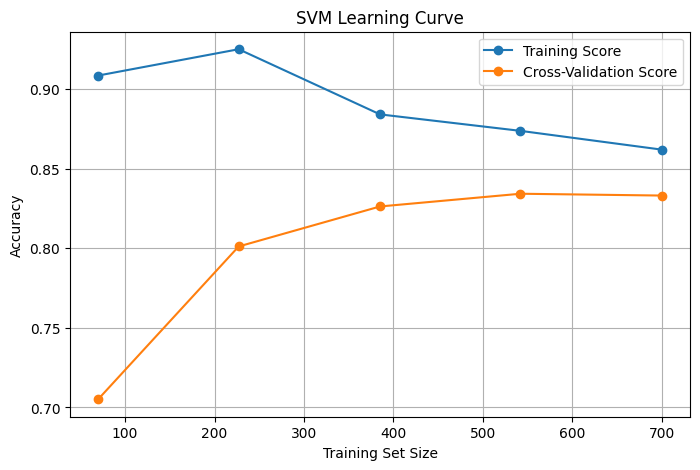

In [131]:
train_sizes, train_scores, test_scores = learning_curve(
    SVC(kernel='rbf', random_state=42), X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score')
plt.title("SVM Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

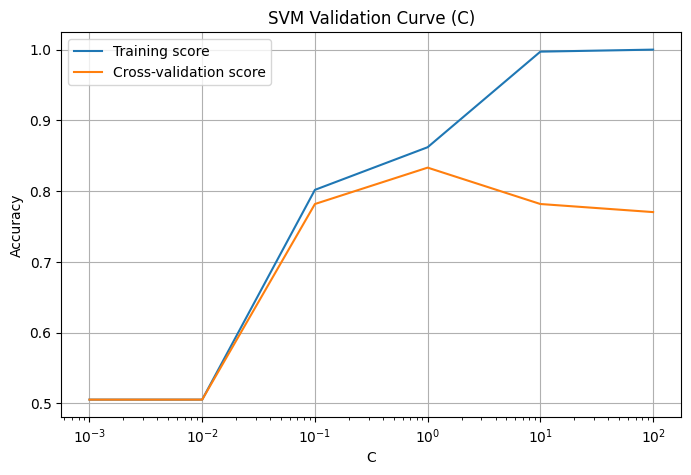

In [132]:

param_range = np.logspace(-3, 2, 6)
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf', random_state=42), X_train, y_train,
    param_name='C', param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.semilogx(param_range, train_mean, label="Training score")
plt.semilogx(param_range, test_mean, label="Cross-validation score")
plt.title("SVM Validation Curve (C)")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [133]:

svm_param_grid = {
    'C': np.logspace(-3, 2, 6),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

print("\n--- SVM Best Parameters ---")
print(svm_grid_search.best_params_)
svm_best_model = svm_grid_search.best_estimator_


--- SVM Best Parameters ---
{'C': np.float64(1.0), 'gamma': 'auto', 'kernel': 'rbf'}



--- Tuned SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       186
           1       0.76      0.95      0.84       190

    accuracy                           0.82       376
   macro avg       0.84      0.82      0.82       376
weighted avg       0.84      0.82      0.82       376


--- Tuned SVM Confusion Matrix ---
[[128  58]
 [ 10 180]]


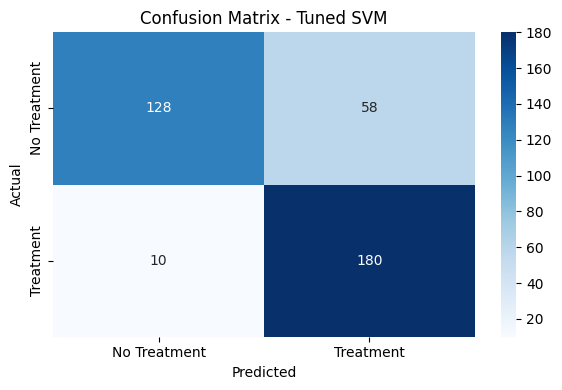

In [134]:
y_pred_best_svm = svm_best_model.predict(X_test)

print("\n--- Tuned SVM Classification Report ---")
print(classification_report(y_test, y_pred_best_svm))

print("\n--- Tuned SVM Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred_best_svm))
y_pred_svm = svm_best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)
labels = ['No Treatment', 'Treatment']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned SVM')
plt.tight_layout()
plt.show()

In [143]:
import shap
shap.initjs()


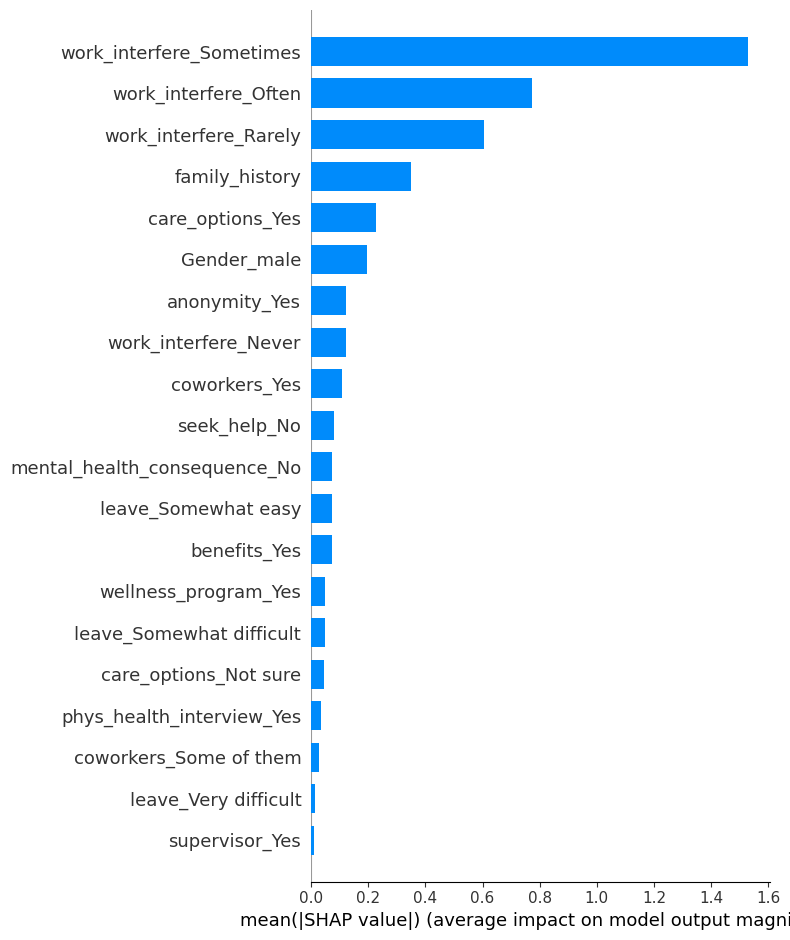

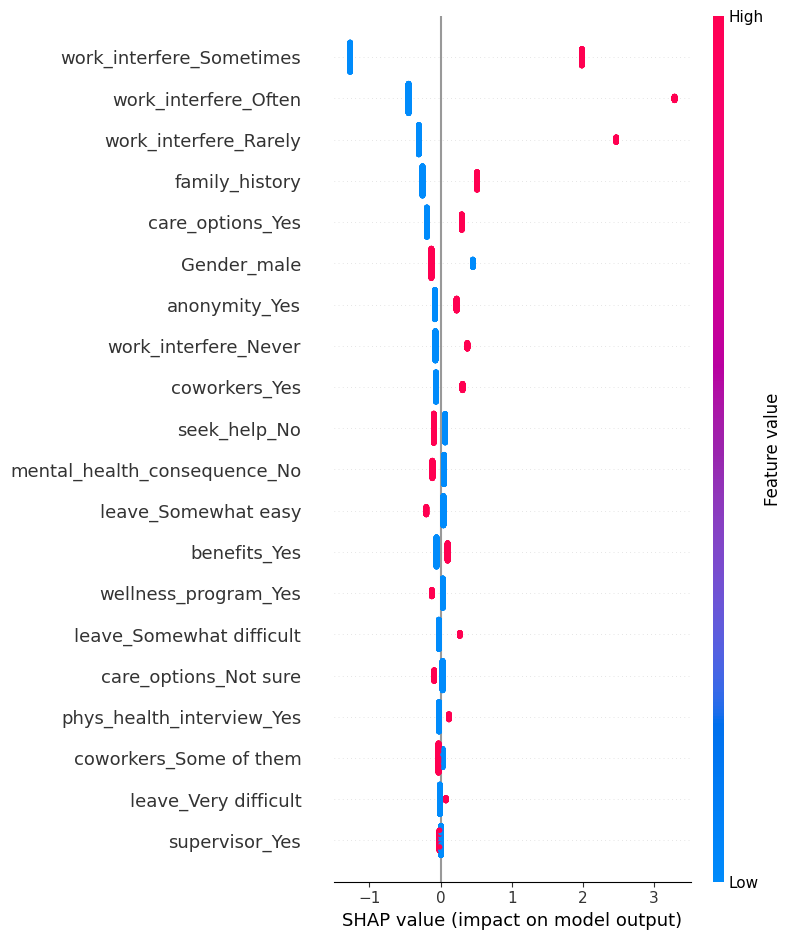

In [144]:
explainer_lr = shap.Explainer(lr_best_model, X_train)
shap_values_lr = explainer_lr(X_train)

shap.summary_plot(shap_values_lr, X_train, plot_type="bar")  
shap.summary_plot(shap_values_lr, X_train)                   